In [73]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [12]:
df = pd.DataFrame(load_iris()['data'])

In [13]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


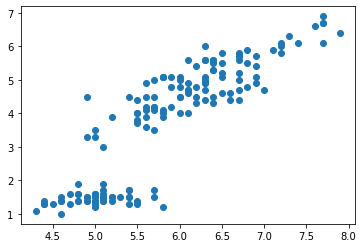

In [16]:
plt.scatter(df[0], df[2])

In [20]:
df = pd.DataFrame(scale(df))
df

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


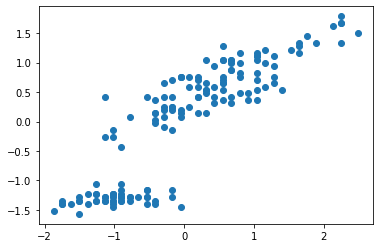

In [32]:
plt.scatter(df[0], df[2])

In [28]:
acp = PCA(n_components=4) # On garde ici 3 dimensions
acp.fit(df)

PCA(n_components=4)

In [33]:
print(f"{acp.explained_variance_ratio_} | somme : {sum(acp.explained_variance_ratio_)}")
# On peut observer que le jeu de données est principalement défini sur deux dimensions voir 3

[0.72962445 0.22850762 0.03668922 0.00517871] | somme : 0.9999999999999999


In [34]:
acp.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [35]:
donnees = acp.fit_transform(df)
print(acp.noise_variance_)

0.0


In [44]:
df = pd.DataFrame(donnees)
df["target"] = load_iris()["target"]
df

,0,1,2,3,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,2
146,1.564580,-0.896687,-0.026371,-0.220192,2
147,1.521170,0.269069,0.180178,-0.119171,2
148,1.372788,1.011254,0.933395,-0.026129,2


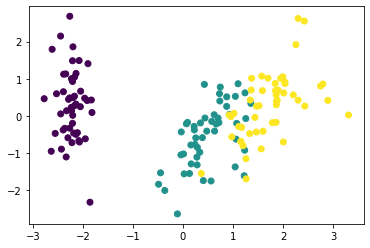

In [47]:
plt.scatter(df[0], df[1], c=df["target"])

C:\Users\Favrelle\AppData\Local\Temp\ipykernel_7044\3392313058.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


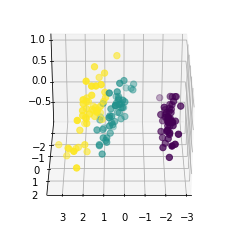

In [61]:
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.scatter(
    
        df[0],
           
        df[1],

        df[2],

        s=40,
    
        depthshade=True,
    
        c=df["target"])

ax.view_init(30, 90)

plt.show()

In [68]:
# Grâce à l'ACP, on se permet de retirer la 3ème colonne du dataframe
df = df.drop([3], axis=1)
df

,0,1,2,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
4,-2.389842,0.646835,0.015738,0
5,-2.075631,1.489178,0.026968,0
...,...,...,...,...
145,1.870503,0.386966,0.256274,2
146,1.564580,-0.896687,-0.026371,2
147,1.521170,0.269069,0.180178,2
148,1.372788,1.011254,0.933395,2


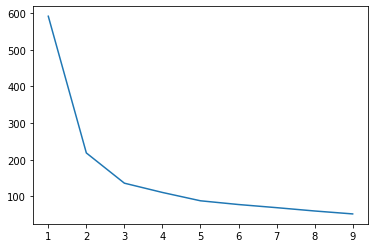

In [76]:
# On cherche d'abord à connaitre le nombre de cluster (k) opti à l'aide de la technique du "coude"
x = df[[0, 1, 2]]
k_range = range(1, 10)
Erreurs = []
Modeles = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    Erreurs.append(km.inertia_)
    Modeles.append(km)

plt.plot(k_range, Erreurs)

In [77]:
# Graphiquement, on déduit que le modèle est optimisé quand k=3
km = Modeles[3-1]

In [79]:
# Prédictions des données
km.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [86]:
# Score du modèle
nb_bonne_reponse = 0
for predicted, target in zip(km.predict(x), df["target"]):
    if predicted == target:
        nb_bonne_reponse += 1
print(f"Score : {nb_bonne_reponse} / {len(df['target'])}")
print(f"Score en pourcentage : {nb_bonne_reponse / len(df['target']) * 100} %")

Score : 124 / 149
Score en pourcentage : 83.22147651006712 %


C:\Users\Favrelle\AppData\Local\Temp\ipykernel_7044\891931505.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


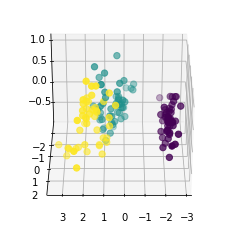

In [88]:
# Visualisation des prédictions en 3D
fig = plt.figure()

ax = fig.gca(projection='3d')

ax.scatter(
    
        df[0],
           
        df[1],

        df[2],

        s=40,
    
        depthshade=True,
    
        c=km.predict(x))

ax.view_init(30, 90)

plt.show()